# Week 3 & 4 Exercise
## Name: Rohit Patil
### Course: DSC640 - Data Presentation & Visualization
### Exercise: 3 & 4 Assignment: White House Logs
### Due Date: 06/29/2025

***

##### For this exercise, you will be working with the White House Logs. Please note: This is not intended to be a political exercise. You are provided 25 datasets that contain information on who visited the White House, when, and for what purpose. For this exercise, you must craft a story about the data based on the following parameters:

**Audience:**

##### As you craft your story, you need to determine who your audience will be and the level of data understanding they possess.
- Are they familiar with the data, potentially an employee or stakeholder? Or are they someone unfamiliar with the data, like the general public? This distinction is important because it will determine how much detail you provide and what kind of jargon you can use with the audience.
- In addition to the audience's familiarity with the data, consider their level of knowledge. Are they executives, board members, employees, children, etc.? This is an important piece of information to keep in mind as it will tailor the visuals you use and again how you present the information and what your audience might be interested in. Consider the scenario where you are creating a story for a parent vs the kids and how different your messaging would be based on those two different audiences.

**Purpose:**
- The story you are presenting must include a call to action. It cannot simply be an informational presentation.
- What is the intent of your message/story? What do you want to get across?
- What are you hoping your audience walks away knowing and understanding?
- Are you asking for approval, recommending a change, or promoting a new direction?

**Medium:**
- How will you present the information?
- Will you create a PowerPoint presentation, dashboard, infographic, video, TikTok, Reel, billboard?
- What is the best method to convey the information based on your selected audience?

**Design:**
What was your strategy with the following elements?
- Color
- Text
- Alignment
- Sizing
- Spacing
  
**Ethical Considerations:**
- What changes were made to the data?
- Are there any legal or regulatory guidelines for your data?
- What risks could be created based on the transformations or how the visualizations are presented?
- Did you make any assumptions in cleaning/transforming or when presenting the data? Did you filter any data without labeling or clearly -identifying that the data was not included?
- How was your data sourced/verified for credibility?
- Was your data acquired in an ethical way?
- How would you mitigate any of the ethical implications you have identified?
  
To get started, analyze the data and determine what looks interesting. You are welcome to make things up, role play, have fun with these exercises.

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read 5 CSV files (January to May 2023)
file_paths = [
    'data/2023.01_WAVES-ACCESS-RECORDS.csv',
    'data/2023.02_WAVES-ACCESS-RECORDS.csv',
    'data/2023.03_WAVES-ACCESS-RECORDS.csv',
    'data/2023.04_WAVES-ACCESS-RECORDS.csv',
    'data/2023.05_WAVES-ACCESS-RECORDS.csv'
]

In [5]:
# Load Data

# Combine all datasets
df_list = [pd.read_csv(file) for file in file_paths]

# Join all datasets
waves_access_records_df = pd.concat(df_list, ignore_index=True)

In [6]:
# Validate if datasets are loaded properly
waves_access_records_df.head()

,Last Name,First Name,Middle Initial,UIN,BDGNBR,Access Type,TOA,POA,TOD,POD,...,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,CALLER_ROOM,RELEASEDATE,Caller Room,Release Date
0,AABYE,MARY,A,U13230,197546.0,VA,Jan 19 2023 8:58AM,NaN,NaN,B04,...,Epstein,Diana,OEOB,Bowling Alley - 037,EPSTEIN,DIANA,NaN,4/30/2023,NaN,NaN
1,AALST,CARLO,B,U10746,NaN,VA,Jan 3 2023 9:37AM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN
2,AARONSON,SCOTT,I,U21068,201034.0,VA,Jan 31 2023 10:42AM,NaN,NaN,D03,...,Durkovich,Caitlin,OEOB,425,KHAN,PUNEET,NaN,4/30/2023,NaN,NaN
3,ABAD,JOHN,C,U11018,NaN,VA,NaN,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN
4,ABADIE,NATHAN,D,U15945,NaN,VA,Jan 21 2023 9:46AM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN


In [7]:
waves_access_records_df.columns

Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'CALLER_ROOM', 'RELEASEDATE',
       'Caller Room', 'Release Date'],
      dtype='object')

In [8]:
# Standardize column names
waves_access_records_df.columns = waves_access_records_df.columns.str.upper().str.replace(' ', '_')

# View column names
waves_access_records_df.columns

Index(['LAST_NAME', 'FIRST_NAME', 'MIDDLE_INITIAL', 'UIN', 'BDGNBR',
       'ACCESS_TYPE', 'TOA', 'POA', 'TOD', 'POD', 'APPOINTMENT_MADE_DATE',
       'APPOINTMENT_START_DATE', 'APPOINTMENT_END_DATE',
       'APPOINTMENT_CANCEL_DATE', 'TOTAL_PEOPLE', 'LAST_UPDATED_BY', 'POST',
       'LAST_ENTRY_DATE', 'TERMINAL_SUFFIX', 'VISITEE_LAST_NAME',
       'VISITEE_FIRST_NAME', 'MEETING_LOCATION', 'MEETING_ROOM',
       'CALLER_LAST_NAME', 'CALLER_FIRST_NAME', 'CALLER_ROOM', 'RELEASEDATE',
       'CALLER_ROOM', 'RELEASE_DATE'],
      dtype='object')

In [9]:
# Validate if datasets are loaded properly after standrdizing column names
waves_access_records_df.head()

,LAST_NAME,FIRST_NAME,MIDDLE_INITIAL,UIN,BDGNBR,ACCESS_TYPE,TOA,POA,TOD,POD,...,VISITEE_LAST_NAME,VISITEE_FIRST_NAME,MEETING_LOCATION,MEETING_ROOM,CALLER_LAST_NAME,CALLER_FIRST_NAME,CALLER_ROOM,RELEASEDATE,CALLER_ROOM,RELEASE_DATE
0,AABYE,MARY,A,U13230,197546.0,VA,Jan 19 2023 8:58AM,NaN,NaN,B04,...,Epstein,Diana,OEOB,Bowling Alley - 037,EPSTEIN,DIANA,NaN,4/30/2023,NaN,NaN
1,AALST,CARLO,B,U10746,NaN,VA,Jan 3 2023 9:37AM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN
2,AARONSON,SCOTT,I,U21068,201034.0,VA,Jan 31 2023 10:42AM,NaN,NaN,D03,...,Durkovich,Caitlin,OEOB,425,KHAN,PUNEET,NaN,4/30/2023,NaN,NaN
3,ABAD,JOHN,C,U11018,NaN,VA,NaN,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN
4,ABADIE,NATHAN,D,U15945,NaN,VA,Jan 21 2023 9:46AM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN


In [10]:
# Data Cleaning
waves_access_records_df['APPOINTMENT_START_DATE'] = pd.to_datetime(waves_access_records_df['APPOINTMENT_START_DATE'], errors='coerce')
waves_access_records_df = waves_access_records_df.dropna(subset=['APPOINTMENT_START_DATE'])
waves_access_records_df['APPT_MONTH'] = waves_access_records_df['APPOINTMENT_START_DATE'].dt.month

In [11]:
# Validate if datasets are loaded properly after trasnforming
waves_access_records_df.head()

,LAST_NAME,FIRST_NAME,MIDDLE_INITIAL,UIN,BDGNBR,ACCESS_TYPE,TOA,POA,TOD,POD,...,VISITEE_FIRST_NAME,MEETING_LOCATION,MEETING_ROOM,CALLER_LAST_NAME,CALLER_FIRST_NAME,CALLER_ROOM,RELEASEDATE,CALLER_ROOM,RELEASE_DATE,APPT_MONTH
0,AABYE,MARY,A,U13230,197546.0,VA,Jan 19 2023 8:58AM,NaN,NaN,B04,...,Diana,OEOB,Bowling Alley - 037,EPSTEIN,DIANA,NaN,4/30/2023,NaN,NaN,1
1,AALST,CARLO,B,U10746,NaN,VA,Jan 3 2023 9:37AM,NaN,NaN,NaN,...,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN,1
2,AARONSON,SCOTT,I,U21068,201034.0,VA,Jan 31 2023 10:42AM,NaN,NaN,D03,...,Caitlin,OEOB,425,KHAN,PUNEET,NaN,4/30/2023,NaN,NaN,1
3,ABAD,JOHN,C,U11018,NaN,VA,NaN,NaN,NaN,NaN,...,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN,1
4,ABADIE,NATHAN,D,U15945,NaN,VA,Jan 21 2023 9:46AM,NaN,NaN,NaN,...,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,4/30/2023,NaN,NaN,1


## Visualization 1: Bar Chart - Top 10 Most Frequent Visitors

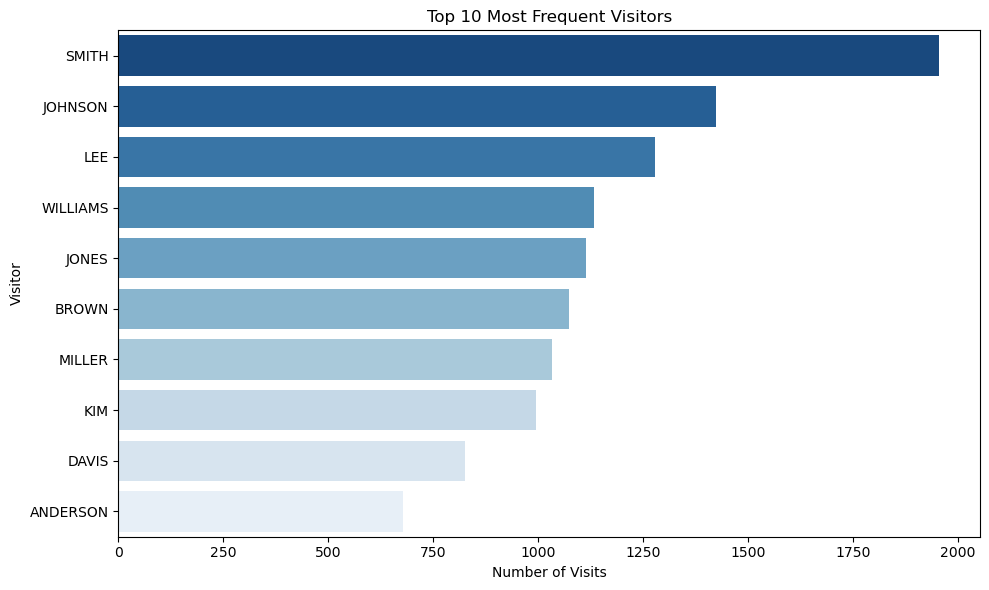

In [13]:
visitor_counts = waves_access_records_df['LAST_NAME'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=visitor_counts.values, y=visitor_counts.index, palette='Blues_r')
plt.title('Top 10 Most Frequent Visitors')
plt.xlabel('Number of Visits')
plt.ylabel('Visitor')
plt.tight_layout()
plt.show()

- This bar graph highlights individuals who visited the White House most often between January through May of 2023.
- This allows the audience to identify the recurring external stakeholders or personnel with the most interactions.
- This also helps the audience assess the major or priority visitors in this period.

## Visualization 2: Bar Chart - Monthly Visits by Meeting Location

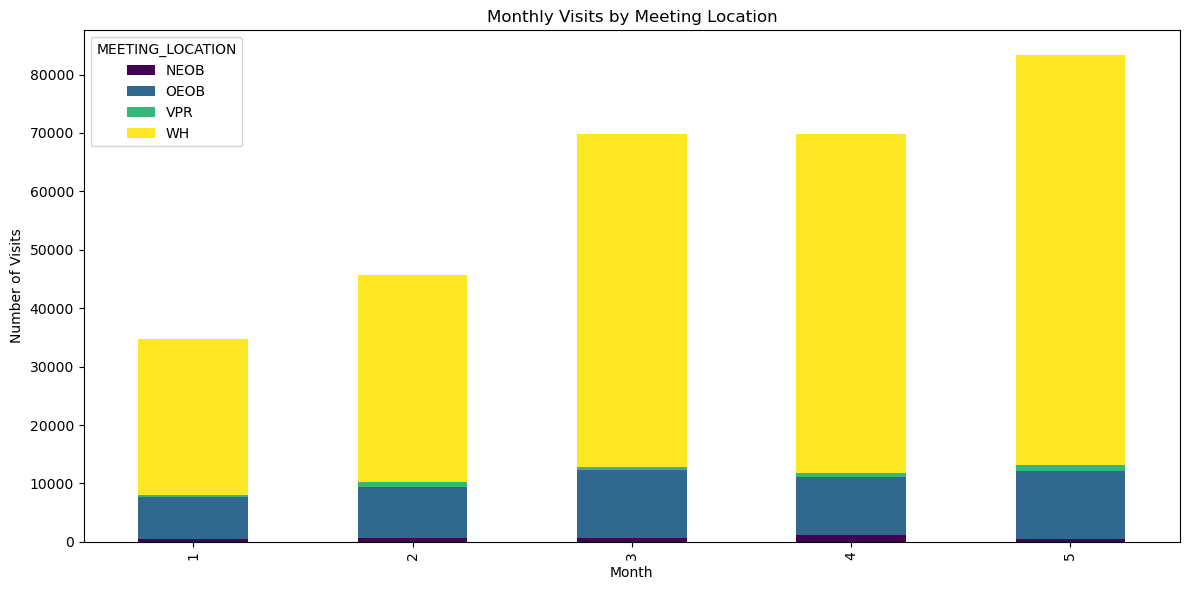

In [16]:
location_counts = waves_access_records_df.groupby('APPT_MONTH')['MEETING_LOCATION'].value_counts().unstack().fillna(0)
location_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Monthly Visits by Meeting Location')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.tight_layout()
plt.show()

- The stacked bar graph shows the volume of visits by location across several months.
- It demonstrates the variability over time of the selected meeting areas.
- This provides decision makers with a valuable opportunity to evaluate the use of space and possibly improve the allocation of rooms.

# Visualization 3: Line Chart - Total Visitors per Day

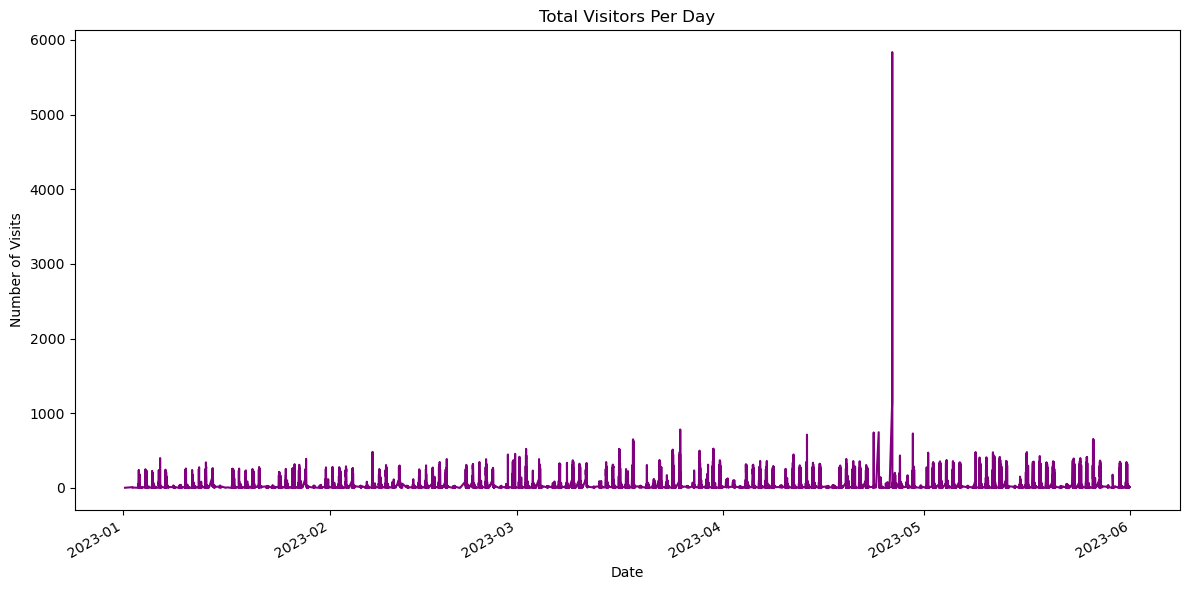

In [19]:
daily_visits = waves_access_records_df.groupby('APPOINTMENT_START_DATE').size()
daily_visits.plot(figsize=(12,6), color='purple')
plt.title('Total Visitors Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.tight_layout()
plt.show()

- The line chart indicates the daily rises and falls of visitors to the White House. 
- Note the peak and low activity days, which may tie back to specific events or policy activities. 
- This provides planning information from a resource allocation, security staffing, or scheduling perspective.

# Visualization 4: Step Chart - Checkpoint Usage Over Time

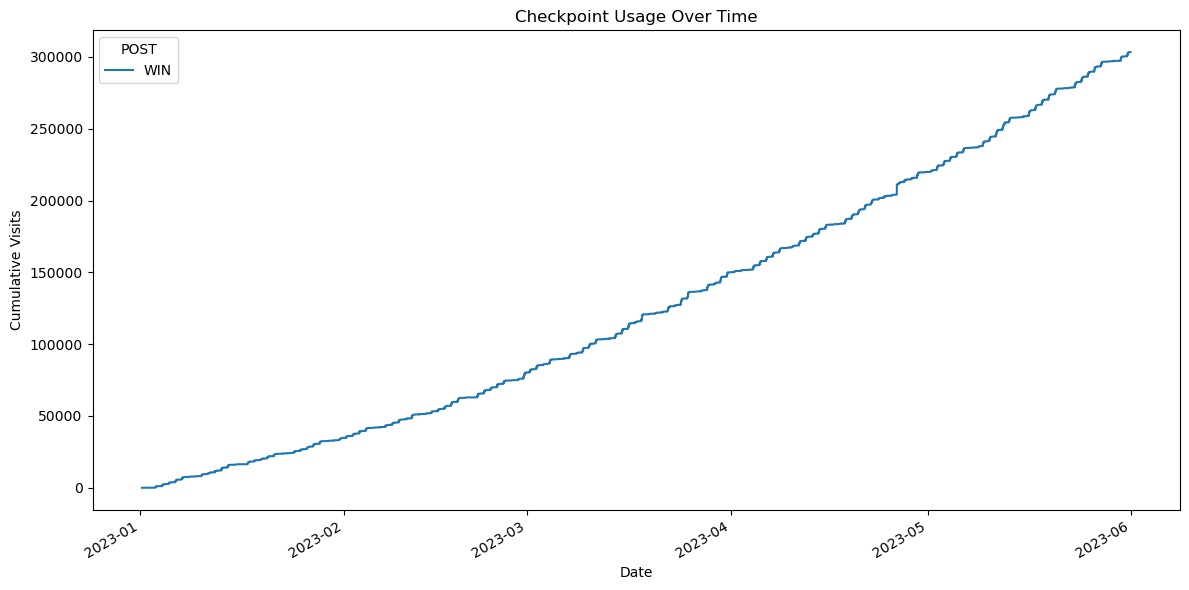

In [22]:
checkpoint_usage = waves_access_records_df.groupby(['APPOINTMENT_START_DATE', 'POST'])['LAST_NAME'].count().unstack().fillna(0)
checkpoint_usage.cumsum().plot(drawstyle='steps-post', figsize=(12,6))
plt.title('Checkpoint Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Visits')
plt.tight_layout()
plt.show()

- This step chart depicts the cumulative figure for every visitor throughput through various security checkpoints.
- It shows entry point usage, as well as how usage grows over time.
- Facilities and security teams could use this to balance the checkpoint loads or perhaps change protocols accordingly.

## Visualization 5: Bar Chart - Top 10 Most Visited Rooms

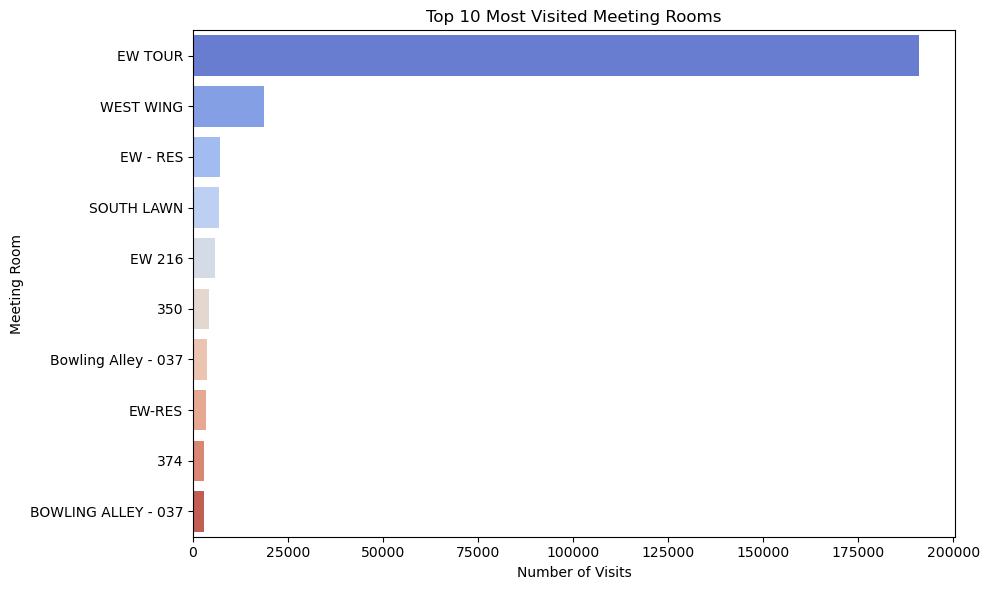

In [25]:
room_counts = waves_access_records_df['MEETING_ROOM'].value_counts().drop('', errors='ignore').head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=room_counts.values, y=room_counts.index, palette='coolwarm')
plt.title('Top 10 Most Visited Meeting Rooms')
plt.xlabel('Number of Visits')
plt.ylabel('Meeting Room')
plt.tight_layout()
plt.show()

- This bar chart shows the meeting rooms with the most visitors.
- It will show the preferred or most used spaces for official meetings.
- This can assist with scheduling priorities in the rooms, maintenance considerations, and/or security planning.

# Visualization 6: Column Chart - Unique Visitors Per Month

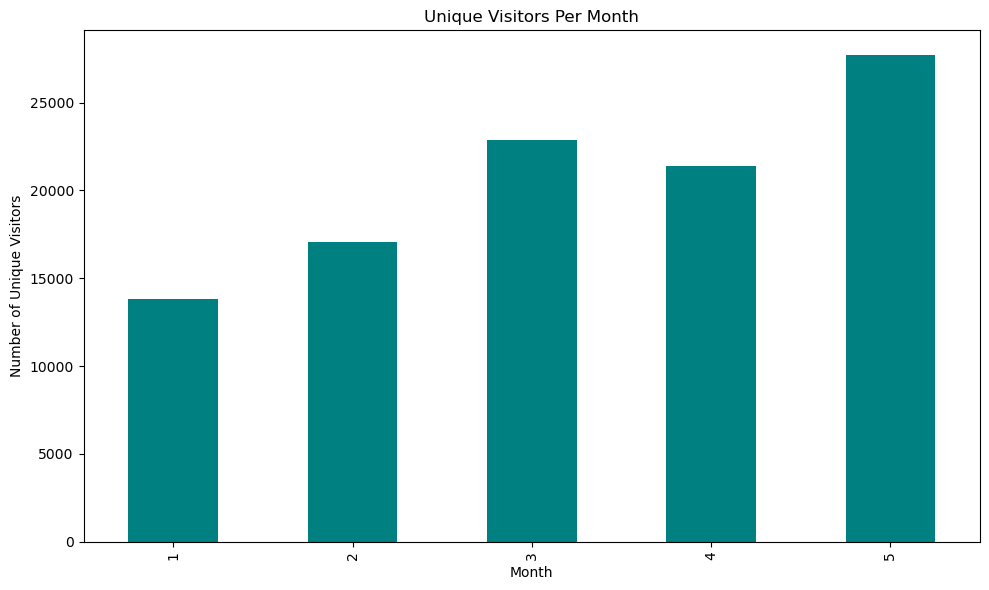

In [28]:
unique_visitors = waves_access_records_df.groupby('APPT_MONTH')['LAST_NAME'].nunique()
unique_visitors.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Unique Visitors Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Visitors')
plt.tight_layout()
plt.show()

- The column chart tracks the number of distinct visitors each month.
- It captures the diversity and breadth of monthly White House engagement.
- This metric supports transparency and can be used to monitor outreach or access trends.

## Visualization 7: Bar Chart - Top Callers by Frequency

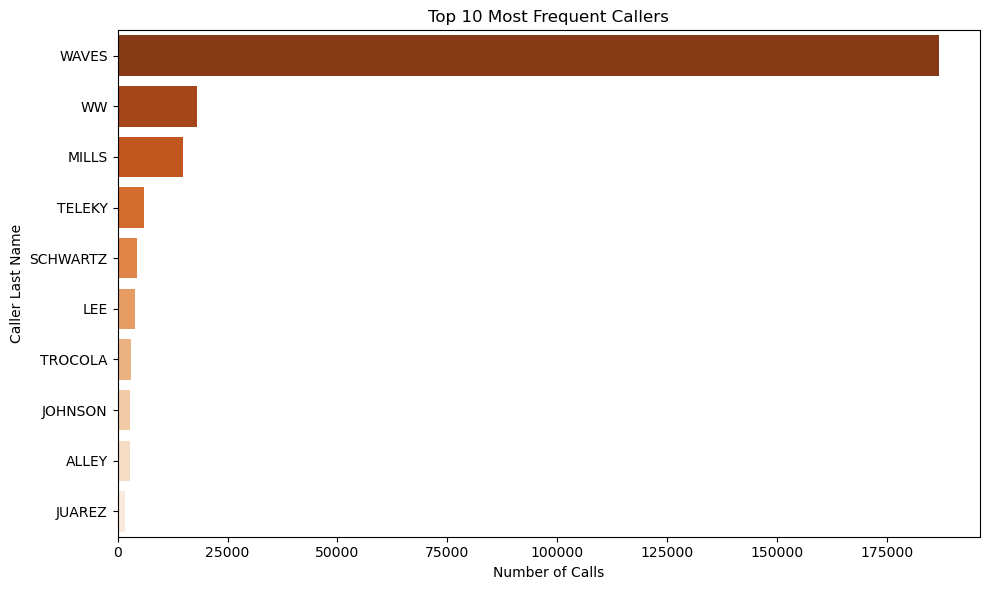

In [31]:
caller_counts = waves_access_records_df['CALLER_LAST_NAME'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=caller_counts.values, y=caller_counts.index, palette='Oranges_r')
plt.title('Top 10 Most Frequent Callers')
plt.xlabel('Number of Calls')
plt.ylabel('Caller Last Name')
plt.tight_layout()
plt.show()

- The chart reflects which staff members (i.e., callers) agreed to arrange visits most often.
- This chart serves as a measure of internal personnel involved in impersonally driving engagement and managing visitors.
- Organizations may use the job as leaders drive or guide engagement. Leaders may consider using this to understand Kes through logistics roles or even the organization of workload.

## Visualization 8: Line Chart - Appointments Made Over Time

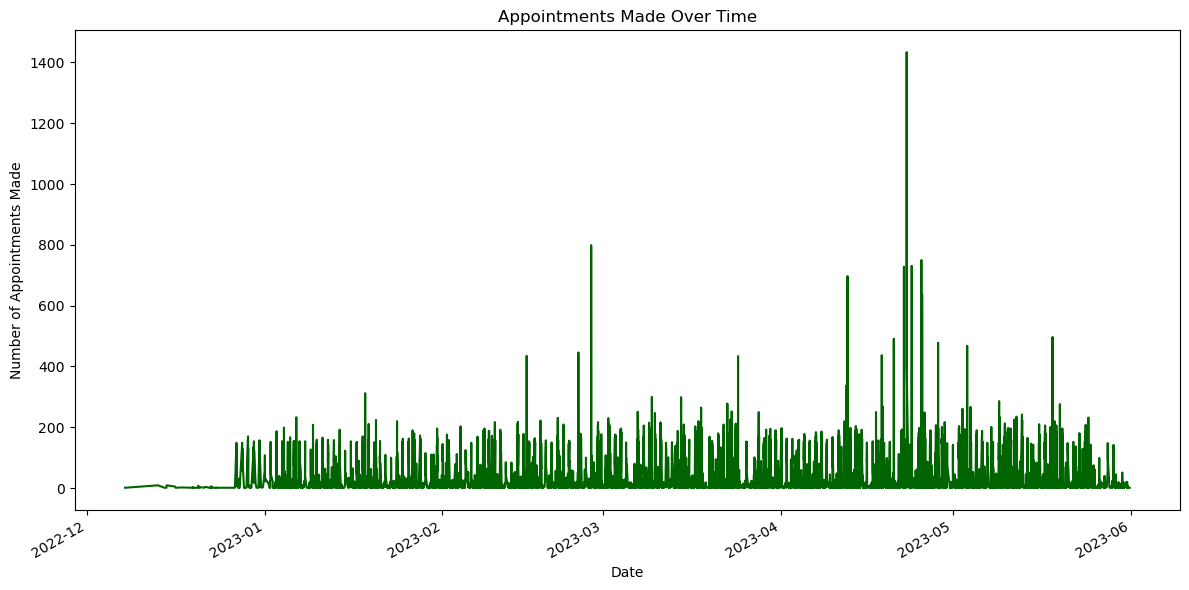

In [34]:
waves_access_records_df['APPOINTMENT_MADE_DATE'] = pd.to_datetime(waves_access_records_df['APPOINTMENT_MADE_DATE'], errors='coerce')
made_by_day = waves_access_records_df.groupby('APPOINTMENT_MADE_DATE').size()
made_by_day.plot(figsize=(12,6), color='darkgreen')
plt.title('Appointments Made Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Appointments Made')
plt.tight_layout()
plt.show()

- This line chart shows the number of appointments made by day.
- It can also be used to track internal activity patterns and anticipate how many visitors may show up in the future.
- This visualization is useful to prepare and plan for visitor services.